# 2. 线性代数（基于Python）
各位同学大家好，欢迎大家来到《线性代数》的世界，上一章《高等数学》我们讨论了许多研究函数的工具，说到底，函数相对是一个连续的世界. 然而事实上，现实世界有很多事情不是连续的，例如当我们拍了一张照片，如果把我们看着是连续变化的图像在电脑上不断放大，你会发现其实是有一个个非常小的像素格组成的，这就是我们在计算中经常使用的一种近似方法，将连续的事物离散化，方便计算机计算.所以在这门课中，我们会讲述离散世界的研究工具，向量、矩阵等等，那我们就开始我们今天的课程吧！

本章的主要内容如下：\
1. 理论知识：
- 线性方程组与向量
- 向量空间、矩阵、行列式以及范数
- 对角化、矩阵的特征值与特征向量、正交化

2. 实战案例：
- Ginger的智慧农场I——图像的基本处理
- 基于PCA的图像特征提取




### 2.1 线性方程组与向量
<div class="alert alert-info" role="alert">
❓ GitModel 公司的实习生Ginger自己在家中后院组建了一个智慧农场，养了几只公鸡和兔子，由于刚来实习，还不会很深的模型，采用的摄像头对动物计数时候，只能统计有多少个头，有多少只脚.现在摄像头采集到的数据是一共有10个头，28只脚，请问鸡兔各有几只？
</div>
我们可以列出一个二元一次方程，假设鸡有$x$只，兔子有$y$只那么可以得到

$$
\left\{\begin{array}{l}
x+y=10 \\
2x+4y=28
\end{array}\right.\label{eq1}
$$

#### 2.1.1 线性方程组
$(\ref{eq1})$在中学阶段叫做二元一次方程组，当然解这个方程组很简单，答案是：$\left\{\begin{array}{l}x=6 \\ y=4\end{array}\right.$.
现在我们忘记中学阶段解二元一次方程组的高斯消元法，把二元一次方程组的本质抽象出来，探讨一种解决二元一次方程组的方法.通过观察，我们发现：二元一次方程组的未知数的阶数都是一次，式子两边都是用等式相连，因此我们给这个方程组起另一个名字：**线性方程组**.在前面的线性方程组中，事实上可以看成是一张表格，

| $x$的系数 | $y$的系数 | 结果 |
|:---------:|:---------:|:----:|
|     1     |     1     |  10  |
|     2     |     4     |  28  |

我们把同一个未知数的系数放在一起，并且每个变量的系数都用一个**向量**表示，如把$x$的系数放在一起，就是$\left[\begin{array}{l}1\\2\end{array}\right]$,类似的，我们把$y$的系数也放在一起，得到$\left[\begin{array}{l}1\\4\end{array}\right]$. 最后，如果我们把所有数值都移到等式的左边，使得方程组中每个等式右边都为零，那么结果事实上可以看成是$1$的系数，称为常数项，如果我们也放在一起，得到$\left[\begin{array}{l}10\\28\end{array}\right]$.最终，我们的方程组$(\ref{eq1})$可以用向量形式表示成

$$
\left\{\begin{array}{l}
x+y=10\\
2x+4y=28
\end{array}\right.
\Rightarrow
\begin{bmatrix}
{1}\\
{2}\\
\end{bmatrix}
x+\begin{bmatrix}
{1}\\
{4}\\
\end{bmatrix}
y = \begin{bmatrix}
{10}\\
{28}\\
\end{bmatrix}\label{eq*}
$$

如果我们将前面包含未知数的两个向量拼接在一起，可以得到一个二维的数表
$$\begin{bmatrix}
{1\quad1}\\
{2\quad4}\\
\end{bmatrix}$$
像这样的数表我们以后将其称为**矩阵**，由于在方程组中，这个矩阵表示的是未知数的系数，故称为系数矩阵，常用$\mathbf{A}$表示.结果向量也称为常数向量，通常记作$b$.

下面我们尝试使用python解线性方程组，```Numpy```中已经封装了求解线性方程组的函数，我们仅需要传入对应的系数矩阵$\mathbf{A}$以及常数向量$b$，程序就会算出相应的结果.

In [1]:
import numpy as np 
A = np.array([[1, 1],
              [2, 4]])     # 将系数所有向量拼在一起
b = np.array([10,
              28])  # 常数向量
x = np.linalg.solve(A,b)   # 解线性方程组
print("线性方程组的解为：\n",x)

线性方程组的解为：
 [6. 4.]


## 2.2 向量空间、矩阵、行列式以及范数

<div class="alert alert-info" role="alert">
❓ 然而，Ginger希望多养几种动物，近日他又引入了几只公鸡和几只鸭子，现在采集到的数据是一共有14个头，40只脚，请问鸡兔鸭各有几只？
</div>

假设鸭子的数目是$z$只，我们直接列出方程组
$$
\left\{\begin{array}{l}
x + y + z = 14 \\
2x+4y + 2z = 40
\end{array}\right.\label{eq2}
$$

我们直接采用Python求解：

In [2]:
A = np.array([[1, 1, 1],
              [2, 4, 2]])     # 将系数所有向量拼在一起
b = np.array([14,
              40])  # 常数向量
x = np.linalg.solve(A,b)   # 解线性方程组
print("线性方程组的解为：\n",x)

LinAlgError: Last 2 dimensions of the array must be square

<div class="alert alert-danger" role="alert">
这个代码一定会报错！它的报错原因说，一定要求系数矩阵是个方阵，这是因为要确定的求解一个多元方程组，有多少个未知数，就需要有多少个方程！所以系数矩阵一定是个方阵.
</div>


那么，如果我们加入动物眼睛的统计数据，方程组可以为：

$$
\left\{\begin{array}{l}
x + y + z = 14 \\
2x+4y + 2z = 40 \\
2x + 2y + 2z = 28
\end{array}\right.\label{eq5}
$$
我们现在再去看每个变量的系数向量，实际上被推广到了三阶，当实际生活中动物越来越多时，我们需要引入的变量也越来越多，所以我们需要引入更高维度的向量来表达我们的问题.一般地，我们研究的问题，变量的个数都是有限的，所以我们一般研究的向量都是有限维的向量，一般称为**n维向量**.

继续使用python求解$\eqref{eq5}$的问题

In [3]:
A = np.array([[1, 1, 1],
              [2, 4, 2],
              [2, 2, 2]])     # 将系数所有向量拼在一起
b = np.array([14,
              40,
              28])  # 常数向量
x = np.linalg.solve(A,b)   # 解线性方程组
print("线性方程组的解为：\n",x)

LinAlgError: Singular matrix

发现事实上还是报错，只不过这次报错的原因是```Singular matrix```，意思是系数矩阵是**奇异的**，或者说是**退化的**.如果观察方程组$\eqref{eq3}$，你会发现其实第三个式子是第一个式子的2倍导出的，如果我们采用高斯消元法求解方程，那么将式子1的-2倍加到第3个式子，第三个式子就为0了.这说明我们新增的这个式子对于解方程实际上起不到任何作用的，因为它的信息已经被囊括在第一个式子中了.

于是现在我们需要解决的问题有两个：
1. 当求解n个未知数时，方程组要满足什么条件，才是有解的？
2. 当我们将向量推广到高维之后，向量之间的计算是满足的吗？

### 2.2.1 向量的运算法则
从上面的方程组改写成向量的表达形式时，大家心中也许会想问一个问题：这两种写法是等价的吗？我们看$\eqref{eq*}$的计算过程：
$$
\begin{bmatrix}
{1}\\
{2}\\
\end{bmatrix}
x+\begin{bmatrix}
{1}\\
{4}\\
\end{bmatrix}
y = \begin{bmatrix}
{10}\\
{28}\\
\end{bmatrix}
\Rightarrow
\begin{bmatrix}
{x}\\
{2x}\\
\end{bmatrix}
+\begin{bmatrix}
{y}\\
{4y}\\
\end{bmatrix}
 = \begin{bmatrix}
{10}\\
{28}\\
\end{bmatrix}
$$
由于要保证对应的分量相等，所以自然我们就可以恢复出方程$\eqref{eq1}$.
上面这个过程，向量的计算有两种：
- 一个数乘一个向量；
- 一个向量加一个向量；
显然，当变量个数变多之后，也会满足上面这两种运算法则，因此我们接下来正式引入向量的基本运算法则：

给定$n$维向量
$$
x= \begin{bmatrix}
{x_1}\\
{x_2}\\
{\vdots}\\
{x_n}
\end{bmatrix},
y= \begin{bmatrix}
{y_1}\\
{y_2}\\
{\vdots}\\
{y_n}
\end{bmatrix}
$$
- 向量的加法定义为：
$$
x+y = \begin{bmatrix}
{x_1 + y_1}\\
{x_2 + y_2}\\
{\vdots}\\
{x_n + y_n}
\end{bmatrix},
$$
即两个向量对应的分量相加.

- 向量的数乘定义为：
对于$k \in \mathbf{R}$,
$$
kx = \begin{bmatrix}
{kx_1 }\\
{kx_2}\\
{\vdots}\\
{kx_n}
\end{bmatrix},
$$
即每个分量都乘上$k$.

关于向量与向量的乘法，在后续的学习中，我们再进一步介绍.我们约定一个使用习惯，我们默认所有的向量都采用列向量的形式，如上面所示.当我们在文中书写时，为了排版优美，通常将向量由列向量转成行向量进行书写，向量的行列交换的称为向量的**转置**，记做$x^T = (x_1, x_2, \cdots, x_n)$.我们使用```Numpy```实现向量之间的基本计算.

In [4]:
import numpy as np
# 生成向量
x = np.array([1, 2, 3]) # array默认如果只有一列，就是一个向量
y = np.array([4, 5, 6])
print("x={},y={}".format(x, y))
print("x的维度为{}".format(x.shape)) # shape函数用于显示向量的维度，如果是向量默认只有一维，维度显示为(dim,)

# 向量加法
print("x+y = {}".format(x + y))

# 向量数乘
k = 3
print("kx = {}".format(k*x))

print("3x+2y ={} ".format(3*x + 2*y))

x=[1 2 3],y=[4 5 6]
x的维度为(3,)
x+y = [5 7 9]
kx = [3 6 9]
3x+2y =[11 16 21] 


我们从几何角度来看这个事情，看看向量的加法与数乘在做什么：
![](./figures/2-1.png)

做好前面的铺垫后，现在我们可以把空间的概念引进来. 在二维空间中，更准确的说在几何空间中，空间存在无数个类似于$[x_1,y_1],[x_2,y_2]$的几何向量，同时空间中还存在控制几何向量之间的相互关系的运算：加法与数乘.举个不太恰当的例子：人类社会中，除了有存在空间中的人以外，还存在着约束每个人的道德与法律.那么n维空间也是一样的，里面存在着无数个n维向量$(x_1,x_2,...,x_n)^T,(y_1,y_2,...,y_n)^T$，同时存在约束着这些向量运算规则的加法和数乘.

至此我们已经回答了第(2)个问题，高维的向量只要是有限维的都是满足我们上面加法与数乘的运算法则的.下面我们想来讨论，对于多个未知数的方程组，什么样的方程组才是有解的？

### 2.2.2 向量的线性相关与线性无关

首先我们需要介绍几个研究向量的工具，我们先来看方程组$\eqref{eq5}$为什么没有解，主要的原因是：从式子化简的结果来说，第一个式子跟第三个式子表达的是一个意思.看另外一个例子
$$
\left\{\begin{array}{l}
x + y + z = 14 \\
2x+4y + 2z = 40 \\
3x + 5y + 3z = 54
\end{array}\right.\label{eq10}
$$

这个方程组，如果你尝试求解的话也会显示```Singular matrix```，仔细观察就会发现第三个式子是由，第一个式子和第二个式子相加得到的，所以第三个式子的信息已经包含在上面两个式子中了，那么我们如何才能一眼看出“式子是有效的”呢？我们拿出一件工具——**向量的线性相关与线性无关**.
给定一组向量$(\alpha_1, \alpha_2, \cdots, \alpha_k)$（注意，这个地方之所以没有转置符号，是因为这是一个向量组，每个$\alpha$都是一个列向量，需要与向量的写法做区分），对于向量$\beta$，如果能被存在一组不全为0的常数$m_1, m_2, \cdots, m_k$，使得
$$\beta = m_1\alpha_1 + m_2\alpha_2 + \cdots + m_k\alpha_k$$
则称向量$\beta$与向量组$(\alpha_1, \alpha_2, \cdots, \alpha_k)$是线性相关的，或称$\beta$可以被向量组$(\alpha_1, \alpha_2, \cdots, \alpha_k)$线性表出.一旦向量是线性相关的，也就说明“$\beta$是一个多余的向量，因为它可以由其他的向量去表示”.

对于方程组$\eqref{eq10}$,如果我们把第$i$个方程当成是一个向量$\alpha_i$（这是不严谨的说法），则$\alpha_3 = \alpha_1 + \alpha_2$，因此第三个方程是多余的.

反之，如果$$m_0\beta + m_1\alpha_1 + m_2\alpha_2 + \cdots + m_k\alpha_k = 0$$当且仅当$m_0, m_1, m_2, \cdots, m_k$全都为0，则称$\beta, \alpha_1, \alpha_2, \cdots, \alpha_k$是线性无关的.

到目前为止，判断一个方程组有唯一解我们有两条法则：
- $n$个未知数要有$n$个方程
- 可以使用线性无关去判断“有效的方程”

然而，如果当一个方程组未知数的量很大之后，你需要去判断哪些方程是“有效的”也是一件非常花时间的工作，有没有一个更好的方法呢，答案是有的，我们先介绍**行列式的概念**.在2.1.1中我们已经介绍了矩阵就是一种数表，而对于我们现在的问题而言，系数矩阵$A$总是行数、列数相等的，因为它的方程个数等于未知数的个数，像这样行数等于列数的矩阵我们称为**方阵**.对于方阵而言，我们可以计算它的行列式$|A|$，用```Numpy```实现如下：

In [5]:
A = np.array([[1, 1, 1],
              [2, 4, 2],
              [2, 2, 2]])

np.linalg.det(A) # 计算方阵A的行列式
print("A的行列式的值为：",np.linalg.det(A))

B = np.array([[1,1,1,1],
              [1,2,0,0],
              [1,0,3,0],
              [1,0,0,4]])
B_det = np.linalg.det(B)
print("B的行列式的值为：",B_det)

# B = np.array([[1,1,1,1],
#               [1,2,0,0],
#               [1,0,0,4]])# 你可以尝试用非方阵计算行列式，压根没法算！

A的行列式的值为： 0.0
B的行列式的值为： -2.0


<div class="alert alert-danger" role="alert">
注意：一定要是方阵才能求行列式！
</div>

有了行列式之后，以后只要我们判断了一个方程组：
1. 未知数个数等于方程的个数
2. 系数行列式$|A| \neq 0$
则这个方程组是有唯一解的.

上面这个判断的法则就是著名的**克莱姆法则(Cramer's Rule)**，更重要的是，克莱姆法则提出了一种解的结构：

设线性方程组的表达式为：$\left\{\begin{array}{c}a_{11} x_{1}+a_{12} x_{2}+\cdots+a_{1 n} x_{n}=b_{1} \\ a_{21} x_{1}+a_{22} x_{2}+\cdots+a_{2 n} x_{n}=b_{2} \\ \cdots \cdots \\ a_{n 1} x_{1}+a_{n 2} x_{2}+\cdots+a_{n n} x_{n}=b_{n}\end{array}\right.$
，系数行列式为：$D = \left|\begin{array}{cccc}a_{11} & a_{12} & \cdots & a_{1 n} \\ a_{21} & a_{22} & \cdots & a_{2 n} \\ \cdots & \cdots & \cdots & \cdots \\ a_{n 1} & a_{n 2} & \cdots & a_{m n}\end{array}\right| \neq 0$，则该线性方程组有且仅有唯一解:

$$
x_{1}=\frac{D_{1}}{D}, x_{2}=\frac{D_{2}}{D}, \cdots, x_{n}=\frac{D_{n}}{D}
$$

其中，$D_{j}=\left|\begin{array}{ccccccc}a_{11} & \cdots & a_{1, j-1} & b_{1} & a_{1, j+1} & \cdots & a_{1 n} \\ a_{21} & \cdots & a_{2, j-1} & b_{2} & a_{2, j+1} & \cdots & a_{2 n} \\ \cdots & \cdots & \cdots & \cdots & \cdots & \cdots & \cdots \\ a_{n 1} & \cdots & a_{n, j-1} & b_{n} & a_{n, j+1} & \cdots & a_{n n}\end{array}\right|$

<div class="alert alert-info" role="alert">
🌰举个例子：
解线性方程组 $\left\{\begin{array}{l}2 x_{1}+x_{2}-5 x_{3}+x_{4}=8 \\ x_{1}-3 x_{2}-6 x_{4}=9 \\ 2 x_{2}-x_{3}+2 x_{4}=-5 \\ x_{1}+4 x_{2}-7 x_{3}+6 x_{4}=0\end{array}\right.$
</div>

**解：**方程组的系数行列式
$$
D=\left|\begin{array}{cccc}
2 & 1 & -5 & 1 \\
1 & -3 & 0 & -6 \\
0 & 2 & -1 & 2 \\
1 & 4 & -7 & 6
\end{array}\right|=27 \neq 0
$$
由克莱姆法则知：方程组有唯一解.

$D_{1}=\left|\begin{array}{cccc}8 & 1 & -5 & 1 \\ 9 & -3 & 0 & -6 \\ -5 & 2 & -1 & 2 \\ 0 & 4 & -7 & 6\end{array}\right|=81 \Rightarrow x_{1}=\frac{D_{1}}{D}=\frac{81}{27} = 3$，
$D_{2}=\left|\begin{array}{cccc}2 & 8 & -5 & 1 \\ 1 & 9 & 0 & -6 \\ 0 & -5 & -1 & 2 \\ 1 & 0 & -7 & 6\end{array}\right|=-108 \Rightarrow x_{2}=\frac{D_{2}}{D} =\frac{-108}{27}= 4$，$D_{3}=\left|\begin{array}{cccc}2 & 1 & 8 & 1 \\ 1 & -3 & 9 & -6 \\ 0 & 2 & -5 & 2 \\ 1 & 4 & 0 & 6\end{array}\right|=-27 \Rightarrow x_{3}=\frac{D_{3}}{D} = =\frac{-27}{27}=-1$，$D_{4}=\left|\begin{array}{cccc}2 & 1 & -5 & 8 \\ 1 & -3 & 0 & 9 \\ 0 & 2 & -1 & -5 \\ 1 & 4 & -7 & 0\end{array}\right|=27 \Rightarrow x_{4}=\frac{D_{4}}{D} = \frac{27}{27} = 1$

In [6]:
# 使用python实现克拉默法则：
D = np.array([[2.,1,-5,1],[1,-3,0,-6],[0,2,-1,2],[1,4,-7,6]])
D_det = np.linalg.det(D)

D1 = np.array([[8.,1,-5,1],[9,-3,0,-6],[-5,2,-1,2],[0,4,-7,6]])
D1_det = np.linalg.det(D1)

D2 = np.array([[2.,8,-5,1],[1,9,0,-6],[0,-5,-1,2],[1,0,-7,6]])
D2_det = np.linalg.det(D2)

D3 = np.array([[2.,1,8,1],[1,-3,9,-6],[0,2,-5,2],[1,4,0,6]])
D3_det = np.linalg.det(D3)

D4 = np.array([[2.,1,-5,8],[1,-3,0,9],[0,2,-1,-5],[1,4,-7,0]])
D4_det = np.linalg.det(D4)

x1 = D1_det / D_det
x2 = D2_det / D_det
x3 = D3_det / D_det
x4 = D4_det / D_det
print("克拉默法则解线性方程组的解为：\n x1={:.2f},\n x2={:.2f},\n x3={:.2f},\n x4={:.2f}".format(x1,x2,x3,x4))

克拉默法则解线性方程组的解为：
 x1=3.00,
 x2=-4.00,
 x3=-1.00,
 x4=1.00


事实上从用得角度上说，这事到这里就结束了，但是你会发现我们还没说行列式是什么:)

下面我们详细介绍行列式的概念.[如果你看到数学就头晕目眩，可以直接跳到2.2.3]

先看一个式子: $D_{2}=\left|\begin{array}{ll}a_{11} & a_{12} \\ a_{21} & a_{22}\end{array}\right|$. 我们称其为 2 阶行列式,其中 $a_{i j}$ 的第一个下标 $i$ 表示此元素所在的行数,第二个下标 $j$ 表示此元素所在的列数, $i=1,2, j=1,2$,于是此行列式中有四个元素,并且 $\left|\begin{array}{ll}a_{11} & a_{12} \\ a_{21} & a_{22}\end{array}\right|=$ $a_{11} a_{22}-a_{12} a_{21} .$ 这是一个什么样的计算规则 $?$ 它背后有什么样的意义?

将此行列式的第 1 行的两个元素 $a_{11}, a_{12}$ 看成一个 2 维向量$\left[a_{11}, a_{12}\right]{:=} \boldsymbol{\alpha}_{1}$，第二行的两个元素 $a_{21}, a_{22}$ 看成另一个 2 维向量 $\left[a_{21}, a_{22}\right]{:=} \boldsymbol{\alpha}_{2}$.不妨设 $\boldsymbol{\alpha}_{1}$ 的长度(模)为 $l, \boldsymbol{\alpha}_{2}$ 的长度(模)为 $m, \boldsymbol{\alpha}_{1}$ 与 $x$ 轴正向的夹角为 $\alpha, \boldsymbol{\alpha}_{2}$ 与 $x$ 轴正向的夹角为 $\beta$, 于是,如图所示：

![jupyter](./figures/2-2.png)

则：
$$
\begin{aligned}
S_{\square O A B C} &=l \cdot m \cdot \sin (\beta-\alpha) \\
&=l \cdot m(\sin \beta \cos \alpha-\cos \beta \sin \alpha) \\
&=l \cos \alpha \cdot m \sin \beta-l \sin \alpha \cdot m \cos \beta \\
&=a_{11} a_{22}-a_{12} a_{21}
\end{aligned}
$$
因此：
$$
\left|\begin{array}{ll}
a_{11} & a_{12} \\
a_{21} & a_{22}
\end{array}\right|=a_{11} a_{22}-a_{12} a_{21}=S_{\square O A B C}
$$
我们看到了一个极其直观有趣的结论: 2 阶行列式是由两个 2 维向量组成的,其(运算规则的)结果为 以这两个向量为邻边的平行四边形的面积. 这不仅得出了 2 阶行列式的计算规则，也能够清楚地看到其几何意义.


### 2.2.3 矩阵

回想一下中学阶段在解方程组的场景：每次将方程组抄一遍，消掉一个未知数，又抄一遍，又消掉一个未知数，又抄一遍······这个过程一直持续，非常麻烦，直到最后一个方程可以被解出来，我们希望有一些更简便的记录方法，下面我们介绍另一个非常强大的工具——**矩阵**，但大家学习矩阵前一定要在心里默念十遍：矩阵不仅仅只是用来解方程！它又非常强大的功能，在后面的章节中，我们将一步一步介绍，在这里我们先介绍一些矩阵的基本运算以及在解方程中的应用.

在之前学过的高斯消元法中，我们对方程有些等价变换，对方程组做了这些变换后，对方程的解是不改变的：
$$
\left\{\begin{array}{l}
x + y + z = 14 \\
2x+4y + 2z = 40 
\end{array}\right.
\Rightarrow
\left\{\begin{array}{l}
2x+4y + 2z = 40 \\
x + y + z = 14
\end{array}\right.
$$

$$
\left\{\begin{array}{l}
x + y + z = 14 \\
2x+4y + 2z = 40 
\end{array}\right.
\Rightarrow
\left\{\begin{array}{l}
2x + 2y + 2z = 28 \\
2x+4y + 2z = 40 
\end{array}\right.
$$

$$
\left\{\begin{array}{l}
x + y + z = 14 \\
2x+4y + 2z = 40 
\end{array}\right.
\Rightarrow
\left\{\begin{array}{l}
x + y + z = 14 \\
2x+4y + 2z = 40 \\
3x + 5y + 3z = 54
\end{array}\right.
$$


如上，**交换两个方程的位置**、**一个方程等号两边同乘一个非零常数$k$**，**一个方程加到另外一个方程上导出一个新方程**，这三种操作显然不会改变方程组的解. 那么我们让计算机知道要做这些操作呢，矩阵建立起了这其中的关系. 

对于一个矩阵$A$，假设行数为$n$，列数为$m$，则它的维度为$n \times m$，记作：$A_{n\times m}$. 当两个矩阵要做**乘法**时，我们要求前一个矩阵的列数要等于后一个矩阵的行数，即：给定$A_{a\times b},B_{c \times d}$，若$AB$有意义，则$b=c$，并且结果的维度为$a\times d$，结果矩阵的第$ij$个元素为：**前一个矩阵的第$i$个行向量与后一个矩阵第$j$个列点乘得到**. 也正是如此，我们不能对矩阵乘法轻易交换顺序，也就是说$AB$不一定等于$BA$，这个一定要注意！
我们只需要记住这些前提，剩下的事情交给计算机.

In [14]:
A = np.array([[1, 2],
              [1, -1]])
B = np.array([[1, 2, -3],
              [-1, 1, 2]])

print("A的规模{}".format(A.shape))
print("B的规模{}".format(B.shape))

# 计算AB
print("AB=\n{}".format(np.matmul(A, B)))

# 计算BA会报错维度不对应
# np.matmul(B, A)

A的规模(2, 2)
B的规模(2, 3)
AB=
[[-1  4  1]
 [ 2  1 -5]]


此外，两个维度大小一个矩阵可以做加法，即对应位置元素相加. 一个矩阵乘一个常数等于每个位置的元素都乘这个常数

In [20]:
A = np.array([[1, 2],
              [1, -1]])
C = np.array([[1, 2],
                [3, 4]])
print("A+C = \n", A + C) # A+C 
print("3*A = \n", 3 * A) # 3*A


A+C = 
 [[2 4]
 [4 3]]
3*A = 
 [[ 3  6]
 [ 3 -3]]


下面我们介绍一些特殊的矩阵，这些矩阵对应着一些特殊变换.
#### 1. **单位矩阵**
在矩阵的乘法中，有一种矩阵起着特殊的作用，如同数的乘法中的1，这种矩阵被称为单位矩阵. 它是个方阵，从左上角到右下角的对角线（称为主对角线）上的元素均为1，除此以外全都为0.


In [32]:
print("B =\n", B,"\n", "E = \n", np.eye(3)) # 3阶单位阵

np.matmul(B, np.eye(3))

B =
 [[ 1  2 -3]
 [-1  1  2]] 
 E = 
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


array([[ 1.,  2., -3.],
       [-1.,  1.,  2.]])

#### 2.初等矩阵
如果你想让计算机懂得解方程组的三个步骤，首先我们先抽象出一个方程组的系数矩阵$A_{n\times m} $，假设下面介绍三个操作对应的矩阵变换，称为初等矩阵：


In [37]:
A = np.array([[1, 1, 1],
              [2, 4, 2]])
print("A = \n", A)

A = 
 [[1 1 1]
 [2 4 2]]


1. **交换第$i$个与第$j$个方程↔️系数矩阵第$i$行与第$j$行互换↔️左乘一个($P_{n \times n}$)，$P$为单位阵$E_{n}$第$i$行与第$j$行互换**
$$
\left\{\begin{array}{l}
x + y + z = 14 \\
2x+4y + 2z = 40 
\end{array}\right.
\Rightarrow
\left\{\begin{array}{l}
2x+4y + 2z = 40 \\
x + y + z = 14
\end{array}\right.
$$

In [38]:
P = np.array([[0, 1],
              [1, 0]])
np.matmul(P, A) # 交换了矩阵的两行

array([[2, 4, 2],
       [1, 1, 1]])

2. **第$i$个方程左右乘非零常数$k$倍↔️系数矩阵第$i$行乘$k$↔️左乘一个($P_{n \times n}$)，$P$为单位阵$E_{n}$第$i$行乘$k$**
$$
\left\{\begin{array}{l}
x + y + z = 14 \\
2x+4y + 2z = 40 
\end{array}\right.
\Rightarrow
\left\{\begin{array}{l}
2x + 2y + 2z = 28 \\
2x+4y + 2z = 40 
\end{array}\right.
$$
[注] 本来应该增广矩阵乘$k$倍，但我们这里仅讨论了系数矩阵，这种做法不太严谨！

In [41]:
P = np.array([[2, 0],
              [0, 1]])
np.matmul(P, A) # 第$i$行乘$k$

array([[2, 2, 2],
       [2, 4, 2]])

3. **第$i$个方程加到第$j$个方程中↔️系数矩阵第$i$行加到第$j$行↔️左乘一个($P_{n \times n}$)，$P$为单位阵$E_{n}$第$i$行加到第$j$行**
$$
\left\{\begin{array}{l}
x + y + z = 14 \\
2x+4y + 2z = 40 
\end{array}\right.
\Rightarrow
\left\{\begin{array}{l}
2x + 2y + 2z = 28 \\
3x+5y + 3z = 44 
\end{array}\right.
$$

In [43]:
P = np.array([[1, 0],
              [1, 1]])
np.matmul(P, A) # 第$i$行乘$k$

array([[1, 1, 1],
       [3, 5, 3]])

有了这三类矩阵之后，你可以构建一个矩阵$P = P_1P_2\cdots C_k$，即等于一列初等矩阵的乘积，那么就可以实现对方程组的系数进行操作，例如对方程组交换两行后，将原来第一行（交换后的第二行）乘两倍，最后加到第二行上.

我们先分开做一下：

In [45]:
A = np.array([[1, 1, 1],
              [2, 4, 2]])
# 方程组交换两行
P1 = np.array([[0, 1],
              [1, 0]])
A = np.matmul(P1, A)

# 原来第一行（交换后的第二行）乘两倍
P2 = np.array([[0, 1],
              [2, 0]])
A = np.matmul(P2, A)

# 第一行加到第二行上
P3 = np.array([[0, 1],
              [1, 1]])
A = np.matmul(P3, A)

A

array([[4, 8, 4],
       [5, 9, 5]])

计算矩阵$P$

In [50]:
A = np.array([[1, 1, 1],
              [2, 4, 2]])

P = np.matmul(P1, P2)
P = np.matmul(P, P1)
print("P = \n", P)

np.matmul(P, A)

P = 
 [[0 2]
 [1 0]]


array([[4, 8, 4],
       [1, 1, 1]])

这里必须说一下，由于在方程中我们一般只做行变换，所以对应的是变换矩阵$P$在左边乘系数矩阵，称为：**左乘**. 在其他场景里，我们可以对矩阵进行列变换，那么相应的是**右乘**一个变换矩阵$P$.

❗这里我们再次强调了为什么矩阵的乘法是一般是不能交换的，因为对应的含义完全不同！

In [52]:
A = np.array([[1, 2],
              [3, 4]])
P = np.array([[0, 1],
              [1, 0]])

print("交换两行：\n", np.matmul(P, A))
print("交换两列：\n", np.matmul(A, P))

交换两行：
 [[3 4]
 [1 2]]
交换两列：
 [[2 1]
 [4 3]]


这下我们知道了，矩阵就类似一种功能模块，我要对行执行这种功能，就左乘一种“功能”，要对列执行这种功能，就右乘“功能”.

事实上，对于任意一个线性方程组，我们都可以抽象成这样的形式
$$Ax=b,$$
其中，矩阵$A$是系数矩阵，$x$是由未知数构成的向量，$b$是常数向量.为了解这样的方程，凭借小学二年级的知识，我们很希望可以将$A$“除过去”变成$\frac{b}{A}$，事实上这个写法是不对的，只是为了大家理解，在矩阵中我们没有定义除法，为了实现类似的功能，我们定义矩阵的逆.

对于$n$阶方阵$A$，如果存在一个$n$阶方阵$B$，使得
$$AB=BA=E_n$$
则我们称$A$是可逆的，$B$是$A$的逆矩阵，记做$A^{-1}$.

如果一个矩阵是可逆的，那么首先它一定要是个方阵，也就是行数等于列数，此外它还要满足行列式不等于0，也就是我们上面提到的**非奇异矩阵**.我们在此不给出严格的证明，这个可以联想除法去理解，当你要“除”过去，作为“分母”自然不能为0.

至于如何计算，我们可以通过```Numpy```模块求解：

In [6]:
import numpy as np

A = np.array([[1, 2], [3, 4]])
print(np.linalg.det(A),"行列式不为0，非奇异阵") # 检验是否奇异
print("A的逆矩阵：\n", np.linalg.inv(A)) # 矩阵求逆

A_inv = np.linalg.inv(A)

print("验证AA_inv = E \n", np.matmul(A, A_inv))

-2.0000000000000004 行列式不为0，非奇异阵
A的逆矩阵：
 [[-2.   1. ]
 [ 1.5 -0.5]]
验证AA_inv = E 
 [[1.00000000e+00 1.11022302e-16]
 [0.00000000e+00 1.00000000e+00]]


这里看着不像单位阵，但实际上是因为数值计算带来的后果，我们仅需要做一下数值过滤即可.事实上，为了一些应用更加简便，对于非奇异阵我们也定义了"伪逆".
它的定义是这样的：对于任意一个矩阵$A \in \mathbb{R}^{n\times m}$，存在一个矩阵$A^g \in \mathbb{R}^{m\times n}$，使得$AA^gA=A$，则称$A^g$为$A$的**伪逆**(广义逆).

具体实现如下：

In [11]:
B = np.array([[0, 1],
              [0, -1]])
print(np.linalg.det(B),"行列式为0，奇异阵") # 检验是否奇异
# print("B的逆矩阵：\n", np.linalg.inv(B)) # 直接求逆会报错

print(np.linalg.pinv(B))
print(np.matmul(np.matmul(B, np.linalg.pinv(B)),B)) # 验证广义逆的定义

0.0 行列式为0，奇异阵
[[ 0.   0. ]
 [ 0.5 -0.5]]
[[ 0.  1.]
 [ 0. -1.]]


接下来我们来研究矩阵的功能，矩阵是如何发挥出它的功能的呢？事实上，矩阵作用的基本元素是向量，我们可以把矩阵$A$看成一个由$m$个$n$维向量组成的方块. 那么要研究矩阵的功能，最首要的是看它在每个向量上的作用. 对于向量而言，最基本的不外乎是平移跟拉伸.

我们提及一个重要的核心概念：**向量在空间中的位置是绝对的，而其坐标值却是相对的，坐标的取值依托于其所选取的坐标向量（基底).** 更直白的说就是，对于同一个向量，选取的坐标向量（基底）不同，其所对应的坐标值就不同.(下图来源于石溪)

![jupyter](./figures/2-3.jpeg)

从中我们可以看到：向量$a$在直角坐标系下与在基底$e_1^{'},e_2^{'}$下的坐标显然是不同.

假设一个向量在坐标系$\mathbb{1}$下表示的坐标为$x$，当这个向量$x$经过一个线性变换形成一个新的向量$y$，用矩阵表示这个变换就是：$y = Ax$，矩阵$A$对应着$x \rightarrow y$的线性变换. 同时，向量也可以在坐标系$\mathbb{2}$下表示，其坐标为$x^{'}$，那么$x^{'} = Px$. 同理，$x^{'}$也可以经过同一个线性变换变成$y^{'}$，即：$y^{'} = Bx^{'}=BPx$. 最后我们把$y^{'}$转化为同一个坐标系下表达，即$y=P^{-1}y^{'}=P^{-1}BPx$. 因此，我们可以得到：$Ax = P^{-1}BPx$，即：
$$
A = P^{-1}BP
$$
我们称满足上式的矩阵A、B称为相似矩阵. 总结一下：一个向量在空间位置里，选取不同的坐标系，其坐标值是不同的. 对于空间中同一个线性变换，在不同的坐标系下，用于描述这个变换的矩阵也是不同的, 而这些不同矩阵所描述的线性变换是相似的，因此我们称他们为**相似矩阵**.

那知道相似矩阵的概念有什么用呢？一个矩阵代表着一个线性变换，而不同的坐标系又会得到不同的相似矩阵，那我们能不能选用一个最佳的坐标系，使得我们描述的这个线性变换的矩阵是最佳的呢？什么矩阵才能称得上是最佳矩阵呢？答案就是**对角矩阵**！因为当我们同时需要经历很多次线性变换的时候，对角矩阵能极大的减少我们的计算量，即：
$$
A^{n}=\left[\begin{array}{lll}
a_{1} & & \\
& a_{2} & \\
& & a_{3}
\end{array}\right]^{n}=\left[\begin{array}{lll}
a_{1}^{n} & & \\
& a_{2}^{n} & \\
& & a_{3}^{n}
\end{array}\right]
$$


In [54]:
A = np.array([[1, 0, 0],
              [0, 2, 0], 
              [0, 0, 3]])
np.matmul(A, A)

array([[1, 0, 0],
       [0, 4, 0],
       [0, 0, 9]])

那给你一组基，我们怎么将这组基转化成最优的基，即**对角矩阵**对应的基呢？【需要注意的是，并不是所有的矩阵都能相似于对角矩阵】

首席按，我们的目标是：找到一个对角矩阵
$\Lambda=\left[\begin{array}{llll}
\lambda_{1} & & & \\
& \lambda_{2} & & \\
& & \cdots & \\
& & & \lambda_{n}
\end{array}\right]$，使得
$$P^{-1}AP = \Lambda$$
其中，矩阵 $P$ 和 $A$ 一样，均为 $n$ 阶方阵。



我们直接给出结论，我们找到的对角矩阵的这些元素$\lambda_i$,称为矩阵$A$的特征值，特征值会满足如下的定义：
$$Ax = \lambda_i x$$
其中，$x$是一个非零向量，称为$A$的特征值$\lambda_i$对应的特征向量.

Python 已经帮我们集成好计算的工具了，下面我们给出代码：

In [70]:
# 使用python求解矩阵的特征值和特征向量
A = np.array([[-2,1,1],
             [0,2,0],
             [-4,1,3]])
lamb,p = np.linalg.eig(A)
print("矩阵A的特征值为：",lamb)
print("矩阵A的特征向量为：\n",p)
print("矩阵A对角化为：\n",np.matmul(np.linalg.inv(p),np.matmul(A,p)))


矩阵A的特征值为： [-1.  2.  2.]
矩阵A的特征向量为：
 [[-0.70710678 -0.24253563  0.30151134]
 [ 0.          0.          0.90453403]
 [-0.70710678 -0.9701425   0.30151134]]
矩阵A对角化为：
 [[-1.00000000e+00 -1.32062993e-16 -3.03478581e-16]
 [-1.60646788e-17  2.00000000e+00 -1.53475516e-17]
 [ 0.00000000e+00  0.00000000e+00  2.00000000e+00]]


需要注意一件事，如果我们采用```Numpy```计算，本质上是一种数值计算，计算的结果是接近真实值的一种数值逼近结果，所以你会发现```-1.32062993e-16```这些非常小的数值，你可以将其作为0看待，那么就可以得到相应的对角化矩阵了. 即：
$\Lambda=\left[\begin{array}{lll}
-1 & &  \\
& 2 & & \\
& & 2 \end{array}\right]$

In [71]:
# 数值过滤
res = np.matmul(np.linalg.inv(p),np.matmul(A,p))
res[np.abs(res) <1e-6] = 0 # 将绝对值小于10的-6次方的值设为0
print(res)

[[-1.  0.  0.]
 [ 0.  2.  0.]
 [ 0.  0.  2.]]


下面我们来讲其中的数学原理，看到数学就头晕目眩的同学可以跳过！

为了方便分析和描述，我们把矩阵$P$写成一组列向量并排 排列的形式： $P=\left[\begin{array}{llll}p_{1} & p_{2} & \ldots & p_{n}\end{array}\right]$, 即 $n$ 个 $n$ 维列向量的横向排列。根据$P^{-1}AP = \Lambda$，我们左乘一个矩阵$P$，得到：$A P=P \Lambda$，具体展开：
$$
A\left[p_{1}, p_{2}, \ldots, p_{n}\right]=\left[p_{1}, p_{2}, \ldots, p_{n}\right]\left[\begin{array}{llll}
\lambda_{1} & & & \\
& \lambda_{2} & & \\
& & \cdots & \\
& & & \lambda_{n}
\end{array}\right]
$$
进而可以得到：$\left[A p_{1}, A p_{2}, \ldots, A p_{n}\right]=\left[\lambda_{1} p_{1}, \lambda_{2} p_{2}, \ldots, \lambda_{n} p_{n}\right]$。那么问题的答案就出来了：为了上面这个等式能成立, 就必须让左右两边的向量在每个维度上分别相等。即, $A p_{1}=\lambda_{1} p_{1}, \quad A p_{2}=\lambda_{2} p_{2}, \ldots, \quad A p_{n}=\lambda_{n} p_{n}$ 。

总结一下：

第一步是：我们要找到满足上述等式$A p_{1}=\lambda_{1} p_{1}, \quad A p_{2}=\lambda_{2} p_{2}, \ldots, \quad A p_{n}=\lambda_{n} p_{n}$的这一组向量 $p_{1}, p_{2}, \ldots, p_{n}$ 。找到他们之后，我们将其横向排列，就构成了我们苦心寻找的转换矩阵 $P=\left[\begin{array}{llll}p_{1} & p_{2} & \ldots & p_{n}\end{array}\right]$;

第二步是：将分别与向量 $p_{1}, p_{2}, \ldots, p_{n}$ 对应的值 $\lambda_{1}, \lambda_{2}, \ldots \lambda_{n}$ 依序沿着对角线排列，就构成 了与矩阵 $A$ 相似的对角矩阵 $\Lambda=\left[\begin{array}{cccc}\lambda_{1} & & & \\ & \lambda_{2} & & \\ & & . & \\ & & & \lambda_{n}\end{array}\right]$ 。

那么对角化的问题就直接转化为了：如何找到满足等式$A p_{1}=\lambda_{1} p_{1}, \quad A p_{2}=\lambda_{2} p_{2}, \ldots, \quad A p_{n}=\lambda_{n} p_{n}$的一组向量$p_{1}, p_{2}, \ldots, p_{n}$和对应的值$\lambda_1,\lambda_2,...,\lambda_n$。首先，我们的等式为：$Ap = \lambda p$，那么$Ap = \lambda Ip$，$I$为单位矩阵。我们稍作变形：$(A-\lambda I)p = 0$，那么如果这个$p$是有解的话，那么$A-\lambda I$的行列式$det(A-\lambda I)=0$。因此我们只需要解这个方程$det(A-\lambda I)=0$就可以求出$\lambda$和向量$p$了。

重点来了：我们把满足$Ap = \lambda p$的数值$\lambda$为矩阵$A$的特征值，称$p$为矩阵$A$关于特征值$\lambda$的特征向量。那特征值和特征向量有什么意义呢？不难看出，由于$Ap = \lambda p$，而一个矩阵对应一个线性变换，因此经过矩阵A变换后的向量竟然是原向量的伸缩，因此特征向量就是那些经过矩阵A变换后的向量方向与变换前的方向相同或者相反的向量。

最后给一个例子给大家演示下怎么求特征值和特征向量吧！

<div class="alert alert-info" role="alert">
🌰举个例子：
求矩阵 $\boldsymbol{A}=\left(\begin{array}{ccc}-1 & 1 & 0 \\ -4 & 3 & 0 \\ 1 & 0 & 2\end{array}\right)$ 的特征值和特征向量.[采用两种方式计算python与手算]
</div>


$$
\begin{aligned}
|A-\lambda E| &=\left|\begin{array}{ccc}
-1-\lambda & 1 & 0 \\
-4 & 3-\lambda & 0 \\
1 & 0 & 2-\lambda
\end{array}\right|=(2-\lambda)\left|\begin{array}{cc}
-1-\lambda & 1 \\
-4 & 3-\lambda
\end{array}\right| \\
&=(2-\lambda)(\lambda-1)^{2}=0
\end{aligned}
$$
特征值为 $\lambda=\mathbf{2}, \mathbf{1}, \mathbf{1}$。

把每个特征值 $\boldsymbol{\lambda}$ 代入线性方程组 $(A-\lambda E) x=0$， 求出基础解系。当 $\lambda=2$ 时, 解线性方程组 $(A-2 E) x=0$。
$$
(A-2 E)=\left(\begin{array}{lll}
-3 & 1 & 0 \\
-4 & 1 & 0 \\
1 & 0 & 0
\end{array}\right) \rightarrow\left(\begin{array}{lll}
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 0
\end{array}\right)
$$
$\left\{\begin{array}{l}x_{1}=0 \\ x_{2}=0\end{array} \quad\right.$ 得基础解系: $p_{1}=\left(\begin{array}{l}0 \\ 0 \\ 1\end{array}\right)$

[后续过程略]

In [62]:
# 使用python求解矩阵的特征值和特征向量
A = np.array([[-1,1,0],
             [-4,3,0],
             [1,0,2]])
lamb,p = np.linalg.eig(A)
print("矩阵A的特征值为：",lamb)
print("矩阵A的特征向量为：\n",p)

矩阵A的特征值为： [2. 1. 1.]
矩阵A的特征向量为：
 [[ 0.          0.40824829  0.40824829]
 [ 0.          0.81649658  0.81649658]
 [ 1.         -0.40824829 -0.40824829]]


在刚刚的讨论中，我们了解了一种十分神奇的向量叫特征向量，这个向量可以在某个矩阵的变换下保持在同一直线上，也就是没有发生角度的偏转。那好奇的我们又开始想问题了，有没有一个矩阵是可以做到令一个向量进行旋转变换或者镜像变换呢？仔细思考下可以发现，这两种变换并没有改变向量的长度，而刚刚的特征向量反而与原向量的关系是拉伸（缩短）的关系。那令一个向量进行旋转变换或者镜像变换的矩阵是什么呢？答案就是：**正交矩阵**。

如果满足以下等式的矩阵$A$称为正交矩阵：
$$
A^TA = AA^T = I
$$
通过上式，我们很快能知道：正交矩阵的逆矩阵与转置矩阵相同，即：$A^{-1} = A^T$，因为：$A^{-1}A=I$。同时，正交矩阵有一个非常好的性质：A的各行是单位向量且两两正交（垂直），又或者说A的各列是单位向量且两两正交（垂直），为什么呢？为了说明这个性质，我们将矩阵$A$分成n个行向量或者n个列向量，即：
$$
A=\left(\begin{array}{c}
\alpha_{1} \\
\alpha_{2} \\
\vdots \\
\alpha_{n}
\end{array}\right)=\left(\beta_{1}, \beta_{2}, \cdots, \beta_{n},\right)
$$

因此，我们可以得到以下规律：
   - $\alpha_{i} \cdot \alpha_{i}^{T}=1$，也就是说$\alpha_{i} $是单位向量。
   - $\alpha_{i} \cdot \alpha_{j}^{T}=0 \quad(i \neq j)$，向量之间两两正交。

说到这里，已经有人能看出来，最简单的一个正交矩阵是单位矩阵，我们可以将它想象成一个坐标轴，而别的正交矩阵可以由这个坐标轴绕着原点进行旋转或者镜像得到，如图：
![jupyter](./figures/2-4.png)

到现在为止，我们已经很显然发现了一个结论：$det(A) = 1$或者$-1$，因为正交矩阵可以由坐标轴组成的正方体旋转或者镜像变换而来，行列式的绝对值描述了向量围成的面积/体积，因此正交矩阵的行列式要么是1，要么是-1。如果是数学推导的话，即：
$$
\begin{aligned}
&1=\operatorname{det}(I)=\operatorname{det}\left(A^{T} A\right)=\operatorname{det}\left(A^{T}\right) \operatorname{det}(A)=\operatorname{det}(A)^{2} \\
&\Rightarrow \operatorname{det}(A)=\pm 1
\end{aligned}
$$

因此给定一组基，我们怎么把他变成标准正交基呢？这里面用到的工具叫**施密特正交化(Gram-Schmidt)**，原理就是：我随便找一个原向量，把它固定住，接着找来第二个向量，往上面做投影，剩下的垂直分量就是第二个正交基，·····重复的做下去，直到所有基都变换过一遍后，得到的这组新的基就是正交基. 更进一步，如果我们把所有基进行标准化，使得每个基自己与自己做内积都为1，即模长为1，则得到的是一组标准正交基. 正交矩阵就为一个单位矩阵，就跟我们上面的解释完全吻合了. 下面给出施密特正交化的Pyhton代码： 


In [68]:
# 施密特正交化(Gram-Schmidt)
from scipy.linalg import *
A = np.array([[1,2,3],
              [2,1,3],
              [3,2,1]])
B = orth(A)  # 正交化，奇异值分解不是施密特正交化
print(np.matmul(B,np.transpose(B)))   # 输出单位矩阵

# 数值过滤
res = np.matmul(B,np.transpose(B))
res[np.abs(res) <1e-6] = 0 # 将绝对值小于10的-6次方的值设为0
print(res)

[[ 1.00000000e+00 -2.77731144e-16 -8.56351296e-17]
 [-2.77731144e-16  1.00000000e+00 -2.10355992e-16]
 [-8.56351296e-17 -2.10355992e-16  1.00000000e+00]]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


有了这些工具后，我们终于可以给Ginger家的智慧农场做点不一样的事情了.


## 项目实战——基于矩阵变换的图像变换

<div class="alert alert-info" role="alert">
❓ 由于某些原因，Ginger发现家里的摄像头拍出来的图片是“倒了”的影像，但作为一个技术从业人员，她认为能用钱解决的事情一定不要用钱去解决. 因此她决定自己动手写一个小程序将这些图片恢复正常.
</div>

<img src="./figures/2-6.jpg" width = "200" height = "400" div align=center />

我们先来看看每个点是怎么旋转的，首先我们建立一个平面直角坐标系，来观察向量的变换.

<img src="./figures/2-7.png" width = "400" height = "400" div align=center />

我们给定一个向量$u=(3,2)$，将其逆时针旋转$90^{\circ}$，可以得到向量$v=(-2,3)$.

设初始向量$u=(x,y)$，逆时针旋转的角度为$\alpha$. 此时可以推出，
$$
\theta = \arctan{\frac{y}{x}} \\
r = ||u||_2
$$
旋转后得到的坐标为
$$
x' = r\cos{(\theta - \alpha)}\\
y' = r\sin{(\theta - \alpha)}
$$
利用三角和差公式得
$$
\cos{(\theta - \alpha)} = \cos{\theta} \cos{\alpha}+\sin{\theta}\sin{\alpha}\\
\sin{(\theta - \alpha)} = \sin{\theta}\cos{\alpha} - \cos{\theta}\sin{\alpha}
$$
则
$$
\begin{aligned}
x' &= r\cos{\theta} \cos{\alpha}+ r\sin{\theta}\sin{\alpha}\\
&= x \cos{\alpha} + y \sin{\alpha}\\
y' &= r\sin{\theta}\cos{\alpha} - r\cos{\theta}\sin{\alpha}\\
&= y \cos{\alpha} - x \sin{\alpha}  
\end{aligned}
$$

<div class="alert alert-warning" role="alert">
<h4>📋任务</h4> 

请你根据上式，补全下面矩阵中的问号处
</div>


上面的式子(38)可以用矩阵形式表达：
$$
\left[\begin{array}{lll} 
x' & y' & 1
\end{array}\right]=\left[\begin{array}{lll} 
x  & y  & 1
\end{array}\right]\left[\begin{array}{ccc}
? & ? & 0 \\
? & ? & 0 \\
0 & 0 & 1
\end{array}\right]
$$

同理，我们可以根据公式(38)计算得到原坐标$(x,y)$关于变换后坐标的表达式:
$$
\left[\begin{array}{lll}
x & y & 1
\end{array}\right]=\left[\begin{array}{lll}
x' & y' & 1
\end{array}\right]\left[\begin{array}{ccc}
\cos \alpha & \sin \alpha & 0 \\
-\sin \alpha & \cos \alpha & 0 \\
0 & 0 & 1
\end{array}\right]
$$

下面我们来尝试用python实现对二维向量的旋转：

In [21]:
# 在------------位置补全代码
import numpy as np
from math import cos, sin, pi

def vec_2d(x0, y0, alpha):
    """
    旋转2维向量.
    x0: 横坐标.
    y0: 纵坐标.
    alpha: 旋转角度，弧度制.
    return:(x,y) 旋转后的坐标.
    """
    origin = np.array([[x0, y0, 1]])
    Trans = np.array([[cos(alpha), -sin(alpha), 0],
                      [sin(alpha), cos(alpha), 0],
                      [0, 0, 1]])
    
    res =   origin.dot(Trans)
    x = # ------------
    y = # ------------
    return (x, y)

In [37]:
# 运行效果应该如下
vec_2d(3, 2, pi/2)

(2.0, -3.0)

但如果这样的话，会出现一个问题，对于一张图片而言，旋转中心在左上角，导致整张图片旋转不是中心旋转的. 下面我们需要对坐标轴进行平移，完善我们的变换公式

<img src="./figures/2-8.png">

假设图片宽度为$W$，高度为$H$，则在第一个坐标系下(左图)的坐标$(x',y')$，变换之后的坐标为$(x'',y'')$，则
$$
\begin{aligned}
x'' &= x'- \frac{1}{2}W \\
y'' &= -y'+ \frac{1}{2}H
\end{aligned}
$$

则对应的矩阵表示为：

<div class="alert alert-warning" role="alert">
<h4>📋任务</h4> 

请你根据上式，补全下面矩阵中的问号处
</div>

$$
\left[\begin{array}{lll}
x'' & y'' & 1
\end{array}\right]=\left[\begin{array}{lll}
x' & y' & 1
\end{array}\right]\left[\begin{array}{ccc}
? & ? & 0 \\
? & ? & 0 \\
? & ? & 1
\end{array}\right]
$$

同理可以求得其逆变换矩阵为：
$$
\left[\begin{array}{lll} 
x _{0} & Y _{0} & 1
\end{array}\right]=\left[\begin{array}{lll} 
x & y & 1
\end{array}\right]\left[\begin{array}{ccc}
1 & 0 & 0 \\
0 & -1 & 0 \\
-0.5 W & 0.5 H & 1
\end{array}\right]
$$


根据图像旋转的一般过程：
1. 将原始图像的坐标系转换为数学坐标系；
2. 通过旋转公式对冬像坐标进行旋转；
3. 将旋转后的数学坐标系转换为图像坐标系.

因此图像旋转的矩阵变换为：
$$
\left[\begin{array}{lll} 
x'' & y'' & 1
\end{array}\right]=\left[\begin{array}{lll} 
x & y & 1
\end{array}\right]\left[\begin{array}{ccc}
1 & 0 & 0 \\
0 & -1 & 0 \\
-0.5 W & 0.5 H & 1
\end{array}\right]\left[\begin{array}{ccc}
\cos \alpha & -\sin \alpha & 0 \\
\sin \alpha & \cos \alpha & 0 \\
0 & 0 & 1
\end{array}\right]\left[\begin{array}{ccc}
1 & 0 & 0 \\
0 & -1 & 0 \\
0.5 W & 0.5H & 1
\end{array}\right]\\
=\left[\begin{array}{lll} 
x & y & 1
\end{array}\right] \left[\begin{array}{ccc}
\cos \alpha & \sin \alpha & 0 \\
-\sin \alpha & \cos \alpha & 0 \\
-0.5 W \cos \alpha +0.5 H \sin \alpha +0.5W & -0.5W \sin \alpha -0.5 H \cos \alpha + 0.5 H & 1
\end{array}\right]
$$

In [111]:
# 图像旋转的矩阵
def Trans(x0, y0, W, H, alpha):
    origin = np.array([[x0, y0, 1]])
    res = origin.dot(np.array([[cos(alpha), sin(alpha), 0],
                     [-sin(alpha), cos(alpha), 0],
                     [-0.5*W*cos(alpha) + 0.5*H*sin(alpha) + 0.5*W, -0.5*W*sin(alpha) - 0.5*H*cos(alpha) + 0.5*H, 1]]))
    return (int(res[0,:2][0]),int(res[0,:2][1]))

(328, 400)

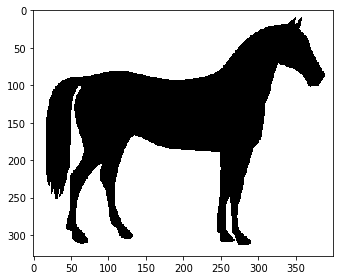

In [112]:
from skimage import io, data
img3 = data.horse()
io.imshow(img3)
img3.shape

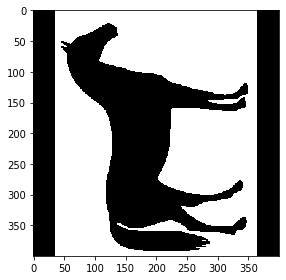

In [113]:
img4 = np.zeros((400, 400))

for x in range(img3.shape[0]):
    for y in range(img3.shape[1]):
        x1, y1 = Trans(x, y, 328, 400, pi/2)
        img4[x1-355, y1] = img3[x, y] # 335是做了一步平移居中，保证画面完整性
io.imshow(img4)

以上，我们理论出发，手把手带着你复现了图像旋转的流程，相信在这个过程中，你已经深刻的体会到了从理论，如何被应用到实际当中！当然，我们的实现过程是比较粗糙的，简单粗暴的！当你理解了一个理论工具后，如果你还将它实现了，更好的方式是把它封装成一个函数，放到你的代码库中，方便日后的使用！

当然现在Python有很多现成的工具库，可以实现图像旋转的功能，例如```skimage```——一个图像处理库.

<div class="alert alert-warning" role="alert">
<h4>📋任务</h4> 

下面请你学习使用```skimage```内置函数```transform.rotate```，尝试一键旋转Ginger的农场里的小鸡！
</div>

文档地址：
[transform.rotate](https://scikit-image.org/docs/stable/api/skimage.transform.html?highlight=transform%20rotate#skimage.transform.rotate)

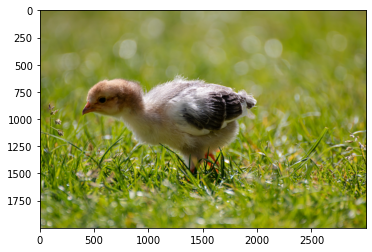

In [109]:
# 在------------位置补全代码
from skimage import io, transform
import matplotlib.pyplot as plt

dirpath = "./figures/2-6.jpg"
img = io.imread(dirpath) #读取数据

# 旋转图像
img2 = #------------
plt.imshow(img2) 

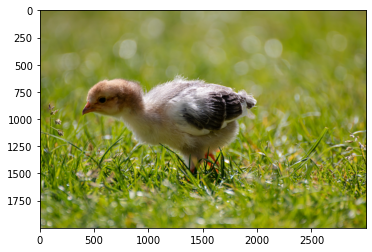

In [110]:
# 请保证运行完是如下结果

<div class="alert alert-success" role="alert">
  <h4 class="alert-heading">Well done!</h4>
  <p>恭喜你，完成了《线性代数》的学习，希望在日后的数模竞赛中，通过本课程的学习，你可以更加深刻的理解矩阵的强大之处，以及更多的使用向量化编程，提高代码的运行效率.</p>
  <hr>
  <p class="mb-0">风里雨里，学数模我们始终与你一起.——GitModel</p>
</div>